In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import community

import community as community_louvain



c:\Users\Dell 5520\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df_original = pd.read_csv('data/primaryschool.csv', header=None, delimiter='\t', names = ['time', 'u', 'v', 'grade_u', 'grade_v'])
print(df_original.head())

metadata = pd.read_csv('data/metadata.txt', header=None, delimiter='\t', names = ['id', 'grade', 'gender'])
print(metadata.head())

    time     u     v grade_u grade_v
0  31220  1558  1567      3B      3B
1  31220  1560  1570      3B      3B
2  31220  1567  1574      3B      3B
3  31220  1632  1818      4B      4B
4  31220  1632  1866      4B      4B
     id grade gender
0  1426    5B      M
1  1427    5B      F
2  1428    5B      M
3  1429    5B      F
4  1430    5B      M


In [3]:
# Sort dataframe by source, target, and timestamp
df_original = df_original.sort_values(by=['u', 'v', 'time'])

# Initialize an empty list to store the results
df = []

# Iterate through the dataframe to calculate weights
for (u, v), group in df_original.groupby(['u', 'v']):
    timestamps = group['time'].tolist()
    weight = 1
    first_time = timestamps[0]
    for i in range(1, len(timestamps)):
        if timestamps[i] == timestamps[i-1] + 20:
            weight += 1
        else:
            df.append({'u': u, 'v': v, 'weight': weight, 'time': first_time})
            weight = 1
            first_time = timestamps[i]
    df.append({'u': u, 'v': v, 'weight': weight, 'time': first_time})

# Create a new dataframe from the result
df = pd.DataFrame(df)

print(df.head(10))

      u     v  weight   time
0  1426  1427       1  36740
1  1426  1427       2  36940
2  1426  1427       2  39640
3  1426  1427       2  52820
4  1426  1427       1  54760
5  1426  1427       2  56580
6  1426  1427       1  60680
7  1426  1427       2  61080
8  1426  1427       1  61160
9  1426  1427       2  61320


In [4]:
grade_dict = {"1A": "red", "1B": "red", "2A": "orange", "2B": "orange", "3A": "gray", "3B": "gray", "4A": "cyan", "4B": "cyan", "5A": "blue", "5B": "blue", "Teachers": "black"}
grade_dict_more = {"1A": "firebrick", "1B": "red", "2A": "orange", "2B": "sandybrown", "3A": "slategray", "3B": "gray", "4A": "darkturquoise", "4B": "cyan", "5A": "cornflowerblue", "5B": "blue", "Teachers": "black"}

node_grade = {}
node_gender = {}
for _, row in metadata.iterrows():
    node_grade[row['id']] = row['grade']
    node_gender[row['id']] = row['gender']

gender_dict = {"M": "blue", "F": "magenta", "Unknown": "gray"}

In [5]:
G = nx.Graph()
for _, row in metadata.iterrows():
    if row['grade'] != "Teachers":
        G.add_node(row['id'], color=grade_dict_more[row['grade']])

for _, edge in df.iterrows():
    if node_grade[edge['u']] != "Teachers" and node_grade[edge['v']] != "Teachers":
        G.add_edge(edge['u'], edge['v'], weight=edge['weight'], time=edge['time'])


In [6]:
group = {grade: metadata[metadata['grade'] == grade]['id'].tolist() for grade in metadata['grade'].unique()}
group = {'1A': group['1A'], '1B': group['1B'], '5A': group['5A'], '5B': group['5B']}

In [7]:
d1_min = 31220
d1_max = 62300

d2_min = 117240
d2_max = 148120

In [8]:
first_break = {"1A": "10:40:00", "1B": "10:10:00", "5A": "09:45:00", "5B": "09:45:00"}


## Task

In [12]:
! pip install teneto

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 32.0/32.0 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 10.4/10.4 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 14.9/14.9 MB 21.1 MB/s eta 0:00:00
   ---------------------------------------- 34.1/34.1 MB 21.8 MB/s eta 0:00:00
   --------------------------------------- 455.4/455.4 kB 27.8 MB/s eta 0:00:00
   ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ---------------------------------------- 3.3/3.3 MB 23.7 MB/s eta 0:00:00
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
   ---------------------------------------- 7.1/7.1 MB 26.7 MB/s eta 0:00:00
   ---------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
spyder 3.3.3 requires pyqt5<=5.12; python_version >= "3", which is not installed.


In [16]:
import teneto
from teneto import TemporalNetwork
from teneto.networkmeasures import temporal_betweenness_centrality
from teneto.networkmeasures import shortest_temporal_path


In [24]:
list(df_filtered[['u', 'v', 'time']].values)

[array([ 1711,  1759, 38420], dtype=int64),
 array([ 1711,  1759, 38660], dtype=int64),
 array([ 1711,  1759, 39820], dtype=int64),
 array([ 1711,  1759, 39840], dtype=int64),
 array([ 1711,  1759, 39860], dtype=int64),
 array([ 1711,  1760, 38640], dtype=int64),
 array([ 1711,  1760, 38660], dtype=int64),
 array([ 1711,  1760, 38680], dtype=int64),
 array([ 1711,  1760, 38740], dtype=int64),
 array([ 1711,  1761, 39600], dtype=int64),
 array([ 1711,  1764, 38480], dtype=int64),
 array([ 1711,  1766, 38420], dtype=int64),
 array([ 1711,  1770, 38760], dtype=int64),
 array([ 1711,  1772, 38420], dtype=int64),
 array([ 1711,  1772, 39260], dtype=int64),
 array([ 1711,  1772, 39280], dtype=int64),
 array([ 1711,  1772, 39300], dtype=int64),
 array([ 1711,  1774, 38780], dtype=int64),
 array([ 1711,  1774, 38800], dtype=int64),
 array([ 1711,  1774, 38820], dtype=int64),
 array([ 1711,  1774, 38900], dtype=int64),
 array([ 1711,  1774, 38980], dtype=int64),
 array([ 1711,  1774, 39020], dt

In [52]:
import numpy as np

def custom_temporal_betweenness_centrality(temporal_adj, G, tmin, tmax, h):
    """
    Custom temporal betweenness centrality using optimized temporal distance function.
    
    Parameters:
    -----------
    temporal_adj : dict
        Temporal adjacency matrix where keys are timestamps, and values are dictionaries of node neighbors.
    G : networkx.Graph
        Static graph representation of the network.
    tmin : int
        Minimum time for reachability consideration.
    tmax : int
        Maximum time for reachability consideration.
    h : int
        Maximum path length in terms of hops.

    Returns:
    --------
    bc : dict
        Betweenness centrality values for each node.
    """
    nodes = list(G.nodes())
    bc = dict.fromkeys(nodes, 0)  # Initialize betweenness centrality

    for source in nodes:
        # Get temporal distances and topological distances for the current source
        T, D = temporal_distance_optimized(temporal_adj, G, source, tmin, tmax, h)

        # Iterate over all pairs of nodes (i, j)
        for i in nodes:
            for j in nodes:
                if i != j and i != source and j != source:
                    # Shortest temporal path from i to j passing through v
                    shortest_paths = []  # Store shortest paths
                    min_temporal_distance = T[j]

                    # Check if any node v lies on the shortest path
                    for v in nodes:
                        if v != i and v != j and T[v] < min_temporal_distance and T[v] != float('inf'):
                            if D[v] == D[i] + D[j] and T[v] == T[i] + T[j]:
                                shortest_paths.append(v)

                    # Update betweenness centrality for nodes on the shortest paths
                    for v in shortest_paths:
                        bc[v] += 1 / len(shortest_paths)

    # Normalize centrality scores
    normalization = (len(nodes) - 1) * (len(nodes) - 2)
    for node in bc:
        bc[node] /= normalization

    return bc


In [ ]:
h = 1

for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df_original[(df_original['u'].isin(nodes)) & (df_original['v'].isin(nodes)) & (df_original['time'] >= tmin) & (df_original['time'] <= tmax)]
    
    temporal_adj = preprocess_temporal_adjacency(df_filtered)

    subgraph = nx.Graph()
    subgraph.add_nodes_from(nodes)
    for _, row in df_filtered.iterrows():
        subgraph.add_edge(row['u'], row['v'], weight=1, time=row['time'])

    betweenness = custom_temporal_betweenness_centrality(temporal_adj, subgraph, tmin, tmax, h)
    betweenness_df = pd.DataFrame(betweenness.items(), columns=['node', 'centrality'])

    # print the top 5 nodes with the highest betweenness centrality
    print(betweenness_df.sort_values(by='centrality', ascending=False).head())

    plt.figure(figsize=(10, 6))
    plt.bar(betweenness_df['node'], betweenness_df['centrality'], color='skyblue')
    plt.xlabel('Node')
    plt.ylabel('Betweenness Centrality')
    plt.title(f'Temporal Betweenness Centrality for Grade {grade}')
    plt.xticks(rotation=90)
    plt.show()



In [ ]:
# h = 1

# for grade, nodes in group.items():
#     tmin = time_to_timestamp(first_break[grade])
#     tmax = tmin + 1*60 # 10 minutes
   
#     df_filtered = df_original[(df_original['u'].isin(nodes)) & (df_original['v'].isin(nodes)) & (df_original['time'] >= tmin) & (df_original['time'] <= tmax)]
    
#     # print number of nodes
#     print(f"Number of nodes: {len(nodes)}")
#     # print number of edges
#     print(f"Number of edges: {len(df_filtered)}")
#     print(f"Number of unique time points: {len(df_filtered['time'].unique())}")

#     temporal_network = TemporalNetwork(from_edgelist=list(df_filtered[['u', 'v', 'time']].values), nettype='bu')
    
#     print("Calculating shortest_paths_df")
#     shortest_paths_df = shortest_temporal_path(tnet=temporal_network, steps_per_t=h) 
#     print("Calculating betweenness centrality")
#     betweenness_centrality_pertime = temporal_betweenness_centrality(paths=shortest_paths_df, calc='pertime')
#     print("Calculating betweenness centrality over time")
#     betweenness_centrality_overtime = temporal_betweenness_centrality(paths=shortest_paths_df, calc='overtime')

#     print(f"Grade: {grade}")
#     print(f"Betweenness centrality per time: {betweenness_centrality_pertime}")
#     print(f"Betweenness centrality over time: {betweenness_centrality_overtime}")

#     betweenness_df = pd.DataFrame(betweenness_centrality_pertime, columns=['node', 'time', 'centrality'])

#     plt.figure(figsize=(10, 6))
#     for node in betweenness_df['node'].unique():
#         subset = betweenness_df[betweenness_df['node'] == node]
#         plt.plot(subset['time'], subset['centrality'], label=f'Node {node}')

#     plt.xlabel('Time')
#     plt.ylabel('Betweenness Centrality')
#     plt.title('Temporal Betweenness Centrality Over Time')
#     plt.legend()
#     plt.show()


Number of nodes: 23
Number of edges: 9
Number of unique time points: 4
Calculating shortest_paths_df


KeyboardInterrupt: 

In [1]:
! pip install networkit

     ---------------------------------------- 6.9/6.9 MB 9.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      ERROR: NetworKit compilation requires cmake.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## Temporal Closeness (not betweenes) centrality

ValueError: supplied range of [inf, inf] is not finite

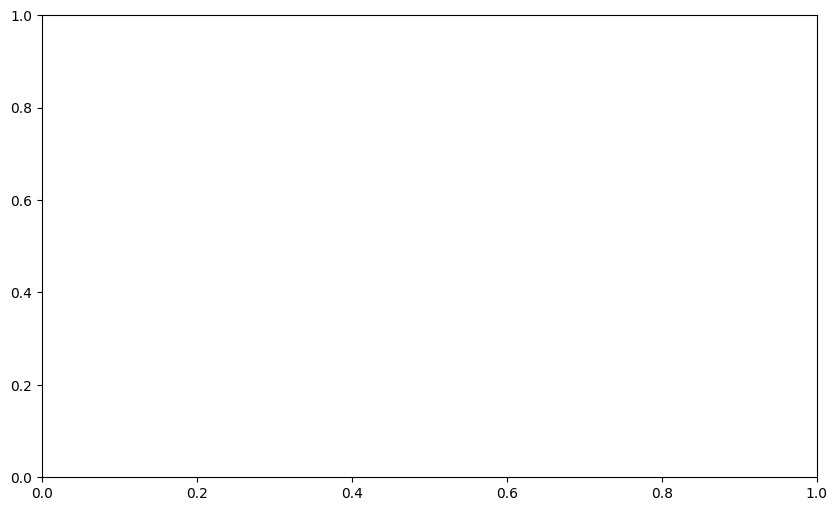

In [ ]:
h = 1

for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df_original[(df_original['u'].isin(nodes)) & (df_original['v'].isin(nodes)) & (df_original['time'] >= tmin) & (df_original['time'] <= tmax)]
    
    # get the subgrraph and temporal adjacency matrix
    temporal_adj = preprocess_temporal_adjacency(df_filtered)

    subgraph = nx.Graph()
    subgraph.add_nodes_from(nodes)
    for _, row in df_filtered.iterrows():
        subgraph.add_edge(row['u'], row['v'], weight=1, time=row['time'])

    # for each node calculate the temporal betweenness centrality
    btw = []
    for source in nodes:
        # Get temporal distances and topological distances for the current source
        T, D = temporal_distance_optimized(temporal_adj, subgraph, source, tmin, tmax, h)
        btw.append(sum(T.values()))
    # normalize
    btw = np.array(btw) / ((len(nodes) - 1) * (len(df_filtered['time'].unique())))

    # plot the distribution of betweenes values
    plt.figure(figsize=(10, 6))
    plt.hist(btw, bins=20, color='skyblue')
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('Frequency')
    plt.title(f'Temporal Betweenness Centrality Distribution for Grade {grade}')
    





## Utils

In [9]:
def draw_graph_per_community(G, pos, node_colors, communities):
    fig, axes = plt.subplots(1, len(communities), figsize=(4*len(communities), 4))
    print(len(communities))
    if len(communities) == 1:
        axes = [axes]  # Ensure axes is iterable

    for ax, community in zip(axes, communities):
        subgraph = G.subgraph(community)
        nx.draw(subgraph, pos, ax=ax, node_color=[grade_dict_more[node_grade[node]]for node in community], with_labels=True, node_size=100, edge_color='gray')
        ax.set_title(f"Community {communities.index(community) + 1}")

    plt.show()

In [10]:
def timestamp_to_time(timestamp):

    is_day_2 = (timestamp > 117000)
    # Convert timestamp to seconds since start of the day
    seconds_since_start = (timestamp - (117240 if is_day_2 else d1_min))

    # Calculate hours, minutes, and seconds
    hours = 8 + (seconds_since_start // 3600)
    minutes = (30 if is_day_2 else 45) + ((seconds_since_start % 3600) // 60)
    seconds = seconds_since_start % 60
    # Adjust for overflow in minutes
    if minutes >= 60:
        hours += 1
        minutes -= 60
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

def time_to_timestamp(time_str, day=1):
    # Parse the time string
    hours, minutes, seconds = map(int, time_str.split(':'))
    # Calculate total seconds since start of the day
    total_seconds = (hours - 8) * 3600 + (minutes - 45) * 60 + seconds
    # Convert to timestamp
    timestamp = (d1_min if day==1 else 117240) + total_seconds
    return timestamp

In [11]:
from collections import defaultdict
import numpy as np

def preprocess_temporal_adjacency(df):
    """Preprocess to create a dictionary of adjacency lists by time."""
    temporal_adj = defaultdict(lambda: defaultdict(list))
    for _, row in df.iterrows():
        temporal_adj[row['time']][row['u']].append(row['v'])
        temporal_adj[row['time']][row['v']].append(row['u'])
    return temporal_adj

def temporal_distance_optimized(temporal_adj, G, source, tmin, tmax, h):
    """
    Optimized temporal distance calculation.
    """
    # Initialize D, T, and R
    D = {node: float('inf') for node in G.nodes()}  # Distance
    T = {node: float('inf') for node in G.nodes()}  # First time of reachability
    R = {node: False for node in G.nodes()}  # Reachable

    D[source] = 0
    T[source] = 0
    R[source] = True

    # Iterate over time windows
    for t in range(tmin, tmax + 1, 20):
        stack = [(node, 0) for node in G.nodes() if R[node]]

        while stack:
            node, depth = stack.pop()
            if depth < h:
                neighbors_t = temporal_adj[t].get(node, [])
                for neighbor in neighbors_t:
                    if not R[neighbor]:
                        R[neighbor] = True
                        T[neighbor] = (t - tmin) / 20
                        D[neighbor] = D[node] + 1
                        stack.append((neighbor, depth + 1))
                    elif T[neighbor] == (t - tmin) / 20 and D[neighbor] > D[node] + 1:
                        D[neighbor] = D[node] + 1
                        stack.append((neighbor, depth + 1))

    return T, D

# # Example usage with preprocessing
# tmin = df['time'].min()
# tmax = tmin + 20 * 180
# h = 3  # Horizon


def run_temporal_distance_analysis(tmin_dict, tmax_dict, h):
    results = []

    for grade, nodes in group.items():
        subgraph = G.subgraph(nodes)
        df_group = df_original[df_original['u'].isin(nodes) & df_original['v'].isin(nodes)]
        temporal_adj = preprocess_temporal_adjacency(df_group)

        # Filter nodes that appear at least once in the given timeframe
        nodes_in_timeframe = set(df_group[(df_group['time'] >= tmin_dict[grade]) & (df_group['time'] <= tmax_dict[grade])]['u']).union(
            set(df_group[(df_group['time'] >= tmin_dict[grade]) & (df_group['time'] <= tmax_dict[grade])]['v'])
        )
        nodes = list(nodes_in_timeframe)

        T = np.zeros((len(nodes), len(nodes)))
        D = np.zeros((len(nodes), len(nodes)))

        tmin = tmin_dict[grade]
        tmax = tmax_dict[grade]

        for node_id, source in enumerate(nodes):
            temporal_distances, node_distances = temporal_distance_optimized(
                temporal_adj, subgraph, source, tmin, tmax, h
            )
            T[node_id, :] = [temporal_distances[node] for node in nodes]
            D[node_id, :] = [node_distances[node] for node in nodes]

        inf_temporal = np.sum(np.isinf(T))
        inf_node = np.sum(np.isinf(D))

        avg_temporal = np.sum(T[np.isfinite(T)]) / (T.size - inf_temporal)
        avg_node = np.sum(D[np.isfinite(D)]) / (D.size - inf_node)
        results.append({
            'grade': grade,
            'inf_temporal': inf_temporal,
            'inf_node': inf_node,
            'avg_temporal': avg_temporal,
            'avg_node': avg_node,
            'efficiency': np.sum(1/T[np.isfinite(T)]),
            'T_matrix': T,
            'D_matrix': D
        })

    return results

# # Example usage with preprocessing
# tmin_dict = {'1A': 36020, '1B': 36020, '5A': 36020, '5B': 36020}
# tmax_dict = {'1A': d1_max, '1B': d1_max, '5A': d1_max, '5B': d1_max}
# h = 3  # Horizon

# all_results = []
# bin_size = 1800  # 30 minutes in seconds

# for increase in range(0, tmax_dict['1A']-tmin_dict['1A'], bin_size):

#     tmin_dict_here = {x: d1_min + increase for x in group.keys()}
#     tmax_dict_here = {x: d1_min + 30*60 + increase for x in group.keys()}

#     results = run_temporal_distance_analysis(tmin_dict_here, tmax_dict_here, h)
#     all_results.extend(results)
#     print(f'time {d1_min + increase} done.')



# # Convert results to a DataFrame for easier plotting
# results_df = pd.DataFrame(all_results)

# # Make a scatterplot of the results
# import matplotlib.pyplot as plt

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# for grade in results_df['grade'].unique():
#     subset = results_df[results_df['grade'] == grade]
#     plt.scatter(subset['avg_temporal'], subset['inf_temporal'], label=grade)

# plt.xlabel('Average Temporal Distance')
# plt.ylabel('Number of Infinite Temporal Distances')
# plt.title('Scatter plot of Average Temporal Distance vs Number of Infinite Temporal Distances')
# plt.legend(title='Grade')
# plt.show()

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# for grade in results_df['grade'].unique():
#     subset = results_df[results_df['grade'] == grade]
#     plt.scatter(subset['avg_node'], subset['inf_node'], label=grade)

# plt.xlabel('Average Node-Temporal Distance')
# plt.ylabel('Number of Infinite Node-Temporal Distances')
# plt.title('Scatter plot of Average Temporal Distance vs Number of Infinite Temporal Distances')
# plt.legend(title='Grade')
# plt.show()
